# HF STO-3G calculation for HeH+



From the book **Modern Quantum Chemistry** by Szabo and Ostlund

A simple HF calculation on $\text{HeH}^+$, which is not symmetric and has charge +2


In [1]:
import numpy as np
import scipy.special as sp
import sympy as sy
import matplotlib.pyplot as plt
import pprint

## Molecular Schroedinger equation

We begin with the time-independent Schrodinger equation for a molecule is

$H\Psi = E\Psi$

$\left[ -\sum_i \frac{\nabla_i^{2}}{2} -\sum_A \frac{\nabla_A^{2}}{2} - \sum_{A,i}\frac{Z_{A}}{r_{Ai}}+\sum_{A>B}\frac{Z_A Z_B}{R_{AB}}+\sum_{i>j}\frac{1}{r_{ij}}\right]\Psi(\boldsymbol{r};\boldsymbol{R})=E\Psi(\boldsymbol{r};\boldsymbol{R})$

Now some theory

## Molecular Schroedinger equation

We begin with the time-independent Schrodinger equation for a molecule is

$$H\Psi = E\Psi$$

We have seen this already in class:

$$\left[ -\sum_i \frac{\nabla_i^{2}}{2} -\sum_A \frac{\nabla_A^{2}}{2} - \sum_{A,i}\frac{Z_{A}}{r_{Ai}}+\sum_{A>B}\frac{Z_A Z_B}{R_{AB}}+\sum_{i>j}\frac{1}{r_{ij}}\right]\Psi(\boldsymbol{r};\boldsymbol{R})=E\Psi(\boldsymbol{r};\boldsymbol{R})$$

This equation in more compact form is:

$$\left[\hat{T}_e(\boldsymbol{r}) +\hat{T}_N(\boldsymbol{R}) +\hat{V} _{eN}(\boldsymbol{r};\boldsymbol{R})+\hat{V}_{NN}(\boldsymbol{R})+\hat{V}_{ee}(\boldsymbol{r})\right]\Psi(\boldsymbol{r};\boldsymbol{R})=E\Psi(\boldsymbol{r};\boldsymbol{R})$$


The sums  $\sum$  have electron $i,j$  and nuclei $A,B$ indices. With the electron positions $\boldsymbol{r}$ and nuclei position $\boldsymbol{R}$ being used to calculate distances between nuclei-electrons $r_{Ai}$, nuclei-nuclei $r_{AB}$ and electron-electron $r_{ij}$. Atomic charges are needed $Z_{A/B}$ in our case $Z_{He}=+2$ and $Z_{H}=+1$.

### Reminder about the terms

$$\left[\hat{T}_e(\boldsymbol{r}) +\hat{T}_N(\boldsymbol{R}) +\hat{V} _{eN}(\boldsymbol{r};\boldsymbol{R})+\hat{V}_{NN}(\boldsymbol{R})+\hat{V}_{ee}(\boldsymbol{r})\right]\Psi(\boldsymbol{r};\boldsymbol{R})=E\Psi(\boldsymbol{r};\boldsymbol{R})$$


Sum of each electron's kinetic energy

$\hat{T}_e(\boldsymbol{r})=-\sum_i \frac{\nabla_i^{2}}{2}$

Sum of each nuclei's kinetic energy

$\hat{T}_N(\boldsymbol{R})=-\sum_A \frac{\nabla_A^{2}}{2}$

Sum of energy from nuclei-electron attraction

$\hat{V} _{eN}(\boldsymbol{r};\boldsymbol{R})= - \sum_{A,i}\frac{Z_{A}}{r_{Ai}}$


Sum of energy from nuclei-nuclei repulsion

$\hat{V}_{NN}(\boldsymbol{R})=+\sum_{A>B}\frac{Z_A Z_B}{R_{AB}}$

Sum of electron-electron repulsion
$\hat{V}_{ee}(\boldsymbol{r})=+\sum_{i>j}\frac{1}{r_{ij}}$

Most often, however, we only consider the electronic problem for a given set of nuclear positions $\boldsymbol{R$} as the electrons are significantly lighter and therefore can be considered to instantanously adjust for any nuclear position. (However, the energy here does not include the nuclear repulsions which need to be added at the end to get the total energy.)

$$\left[ \hat{T}_e(\boldsymbol{r})+ \hat{V} _{eN}(\boldsymbol{r};\boldsymbol{R})+\hat{V}_{ee}(\boldsymbol{r})\right]\Psi(\boldsymbol{r})=E_{el}\Psi(\boldsymbol{r})
$$

One of the challenges in solving this equation is that you do not know where the electron resides only where it is statisically likely to be if you took a measurement - called the many-body effect. This makes the terms involving the electron repulsions ($+\sum_{i>j}\frac{1}{r_{ij}}$) difficult to calculate.

In the Hartree-Fock approach the first approximation used is to treat each electron separately interacting with an averaged distribution of the other electrons (mean field approach).

$$\left[ -\sum_i \frac{\nabla_i^{2}}{2}- \sum_{A,i}\frac{Z_{A}}{r_{Ai}}+v_{HF}(i)\right]\Psi(\boldsymbol{r})=\epsilon_{ij}\Psi(\boldsymbol{r})$$

The functions chosen to represent each electron is based on the hydrogen atomic solutions, which are exact, for an electron around an atom of hydrogen the atomic orbitals.

So we consider a product of one-electron wavefunctions $\psi_i(\boldsymbol{r})$ interacting with a mean field of all the other electrons.

$$\Psi(\boldsymbol{r}) = \psi_1(\boldsymbol{r}_1)\psi_2(\boldsymbol{r}_2)\psi_3(\boldsymbol{r}_3)...=\prod_i \psi_i(\boldsymbol{r}_i)$$

However this does not have the correct symmetry requirements which means if you swap electrons the sign of the wavefunction inverts. This requirement means that the Fermions (electrons) cannot occupy the same quantum states and do not collapse towards the nucleus. We can construct something called a slater determinant which does have the correct symmetry properties.

$$\Psi(\mathbf{r}_1, \mathbf{r}_2, \ldots, \mathbf{r}_N) =
\frac{1}{\sqrt{N!}}
\left|
   \begin{matrix} \psi_1(\mathbf{r}_1) & \psi_2(\mathbf{r}_1) & \cdots & \psi_N(\mathbf{r}_1) \\
                      \psi_1(\mathbf{r}_2) & \psi_2(\mathbf{r}_2) & \cdots & \psi_N(\mathbf{r}_2) \\
                      \vdots & \vdots & \ddots & \vdots \\
                      \psi_1(\mathbf{r}_N) & \psi_2(\mathbf{r}_N) & \cdots & \psi_N(\mathbf{r}_N)
   \end{matrix} \right|\equiv \left|\psi _1,\psi _2,\cdots ,\psi _N\right.\rangle$$
   
$\left|\psi _1,\psi _2,\cdots ,\psi _N\right.\rangle$ is often written simply as $\psi_i(\boldsymbol{r}_i)$
This means we can write a set of $i$ equations which can be solved for a set of one-electron wavefunctions.

$$\left[ -\sum_i \frac{\nabla_i^{2}}{2}- \sum_{A,i}\frac{Z_{A}}{r_{Ai}}+v_{HF}(i)\right]\psi_i(\boldsymbol{r}_i)=\epsilon_{ij}\psi_i(\boldsymbol{r}_i)$$

What then is $v_{HF}(i)$ we can consider two interactions a coulomb interaction $\mathscr{J}$ (repulsion between the "averaged out" one-electron orbitals) and an exchange interactions $\mathscr{K}$ which is not classical and is due to electrons of the same spin being indistinguishable which lowers the energy of the system.

$v_{HF}(i) = \sum_j \left[ 2\mathscr{J}_j - \mathscr{K}_j\right]$
Where the sum is over all of the other j electrons. There is a double contribution from the coulomb operator as we are considering closed shell systems where there are two electrons per orbital but the exhange operator is only considered once as this interaction can only be between electrons with like-spins. This means for our HeH+ system it will not contribute as we have

$$\mathscr{J}_j =  \int \psi_j(\boldsymbol{r}_j)^* \frac{1}{r_{i,j}}\psi_j(\boldsymbol{r}_j) dr
\mathscr{K}_j\psi_i(\boldsymbol{r}_i) =  \left[\int \psi_j(\boldsymbol{r}_j)^* \frac{1}{r_{i,j}}\psi_i(\boldsymbol{r}_i)dr\right]\psi_j(\boldsymbol{r}_j)$$

You will notice the indices have switched for the exchange operator.

The first two terms are often considered as the core terms as they are the kinetic energy and potential energy for an isolated system such as the hydrogen atom and therefore they are refered to as $\mathscr{H}^{CORE}$

$$\mathscr{H}^{CORE} = -\sum_i \frac{\nabla_i^{2}}{2}- \sum_{A,i}\frac{Z_{A}}{r_{Ai}}$$

Putting this all together we get the Hartree-Fock equation

$$\left( \mathscr{H}^{CORE} + \sum_j \left[ 2\mathscr{J}_j - \mathscr{K}_j\right]   \right)\psi_i(\boldsymbol{r}_i) = \sum_j \epsilon_{ij}\psi_i(\boldsymbol{r}_i)$$

Or simply

$$\mathscr{f}_i\psi_i(\boldsymbol{r}_i) = \epsilon_{i}\psi_i(\boldsymbol{r}_i)$$
where $\mathscr{f}_i$ are the fock operators

<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Orbitals 

The most successful method to construct these one-electron wavefunctions $\psi_i$ is to consider them delocalised over the whole molecule. Therefore there will be a set of orbitals, one for each electron, which are spread over the whole molecule. We call this type of treatment molecular orbital theory. The question then is what functions do we use to treat these one-electron delocalised orbitals. We know the solutions exactly for a hydrogen like atom so we can use atomic orbitals $\phi_i(\boldsymbol{r}_i)$ centred at each atom $\boldsymbol{r}_i$ to be the basis for our delocalised molecular orbitals. We need to be able to optimise the amounts of each of these atomic orbitals in each of our one-electron delocalised orbitals so we consider a linear combination of atomic orbitals (LCAO).

$$\psi_i(\boldsymbol{r}_i) = \sum_{\mu} c_{\mu} \phi_{\mu}(\boldsymbol{r}_i)$$
where the constants $c_i$ are going to be optimised to minimise the energy.

The method relies on the variational principle which is true for the Hartree-Fock equations which is that any approximation you make (i.e. describing the electrons as a LCAO) will raise the energy above the real energy of the system. The advantage of a variational method is that you can systematically improve the wavefunction and improve your result knowing that you will be able to converge upon a value (which will be above the actual energy).

The atomic orbitals are called the slater type orbitals for the 1s orbital this can be written as

$$\phi^{SLA}\left( \boldsymbol{r}\right) = \left( \zeta^3/\pi \right)^{1/2}e^{-\zeta \boldsymbol{r}}$$


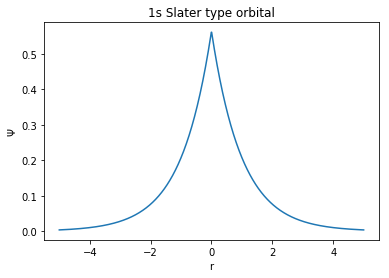

In [2]:
x = np.linspace(-5,5,num=1000)
r = abs(x)

zeta = 1.0

Ψ_STO = (zeta**3/np.pi)**(0.5)*np.exp(-zeta*r)

fig, ax=plt.subplots(1)
ax.plot(x,Ψ_STO)
ax.set_title('1s Slater type orbital')
ax.set_ylabel("Ψ")
ax.set_xlabel('r')
plt.show()

Slater type orbitals (STO) are the exact solutions for the hydrogen atom and provide an accurate basis set for many electron molecules however the calculations of the integrals are expensive as their is no simple exact solution for the integrals. One way around this is to approximate the Slater type orbitals using a sum of contracted Gaussian functions (CGF). There are simple analytical expressions for the integrals between two Gaussians so this can save a lot of computing time. Let's look at this for the case of the 1s orbital

$$\phi^{GF}(\alpha)=(2\alpha/\pi)^{3/4}exp(-\alpha r^{2})$$

$$\phi^{CGF}\left( \boldsymbol{r}\right) = \sum_n d_n\phi^{GF}_n(\alpha)$$

We will make use of three Gaussians to approximate the slater type orbitals.

$$\phi^{CGF}_{STO-3G}\left( \boldsymbol{r}\right) = \sum^3_n d_n\phi^{GF}_n(\alpha)$$

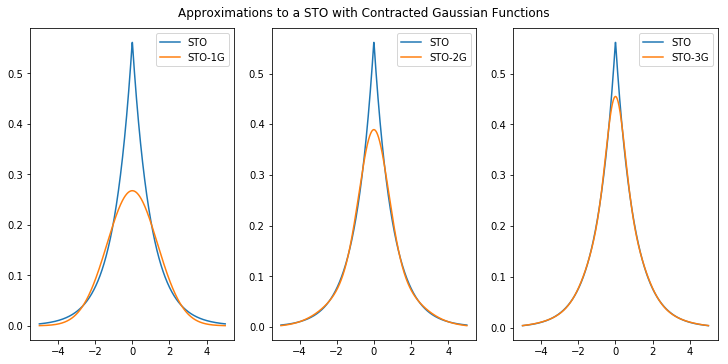

In [3]:
Coeff = np.array([[1.00000,0.0000000,0.000000],
                  [0.678914,0.430129,0.000000],
                  [0.444635,0.535328,0.154329]])

# Expon is the alpha variable in the equation above
Expon = np.array([[0.270950,0.000000,0.000000],
                  [0.151623,0.851819,0.000000],
                  [0.109818,0.405771,2.227660]]) 

Ψ_CGF_STO1G = Coeff[0,0]*(2*Expon[0,0]/np.pi)**(0.75)*np.exp(-Expon[0,0]*r**2)
Ψ_CGF_STO2G = Coeff[1,0]*(2*Expon[1,0]/np.pi)**(0.75)*np.exp(-Expon[1,0]*r**2) \
                + Coeff[1,1]*(2*Expon[1,1]/np.pi)**(0.75)*np.exp(-Expon[1,1]*r**2) \
                + Coeff[1,2]*(2*Expon[1,2]/np.pi)**(0.75)*np.exp(-Expon[1,2]*r**2)
Ψ_CGF_STO3G = Coeff[2,0]*(2*Expon[2,0]/np.pi)**(0.75)*np.exp(-Expon[2,0]*r**2) \
                + Coeff[2,1]*(2*Expon[2,1]/np.pi)**(0.75)*np.exp(-Expon[2,1]*r**2) \
                + Coeff[2,2]*(2*Expon[2,2]/np.pi)**(0.75)*np.exp(-Expon[2,2]*r**2)
    
# Plot the three functions
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,5),constrained_layout=True)

fig.suptitle("Approximations to a STO with Contracted Gaussian Functions")
ax1.plot(x,Ψ_STO,label="STO")
ax1.plot(x,Ψ_CGF_STO1G,label="STO-1G")
ax1.legend()
ax2.plot(x,Ψ_STO,label="STO")
ax2.plot(x,Ψ_CGF_STO2G,label="STO-2G")
ax2.legend()
ax3.plot(x,Ψ_STO,label="STO")
ax3.plot(x,Ψ_CGF_STO3G,label="STO-3G")
ax3.legend()


plt.show()

As the number of Gaussians is increased the function more closely describes the slater type orbitals. You will also see that nearest the centre $(x=0)$ the approximation is poorest. This region is called the cusp.

We will use this very poor basis set for our $\text{HeH}^+$ molecule for ease of calculation but for accurate calculations at the very least a 6-311G(d,p) basis set will used which would have 6 contracted Gaussian functions to describe hydrogen and helium 1s orbital.

## Roothan Hall equations

The Hartree-Fock equations need to be converted into a tabular form (matrix form) using the basis set of atomic orbitals to allow for a solution to be determined using the computer. We insert our basis set of orbitals $\sum_i c_i \phi^{CGF}_i(\boldsymbol{r}_i)$ (we will drop the superscript and just have the orbitals denoted as $\phi_i$) We are also going to be building up a table by combining different basis set indices so will use the subscripts $\nu$ and $\mu$ to denotes the indices as we build up the table/matrix. We will also replace ($\boldsymbol{r}_\nu$) with (1) for ease of reading.

$$\mathscr{f}_i\psi_i(\boldsymbol{r}_i) = \epsilon_{i}\psi_i(\boldsymbol{r}_i)$$

$$\mathscr{f}_i\sum^K_{\nu =1} c_{\nu 1} \phi_{\nu}(1) = \epsilon_{i}\sum^K_{\nu =1} c_{\nu i} \phi_{\nu}(1)$$

We left multiply the other basis set index of our table and integrate.

$$\sum^K_{\nu =1}c_{\nu 1} \int d\nu_1 \phi_{\mu}(1) \mathscr{f}_i \phi_{\nu}(1) = \epsilon_{i}\sum^K_{\nu =1} c_{\nu i}\int d\nu_1 \phi_{\mu}(1)\phi_{\nu}(1)$$

This last term $\int d\nu_1 \phi_{\mu}(1)\phi_{\nu}(1)$ is called the overlap integral written as $S_{\mu \nu}$. This term will help to illustrate the population of a table if we want to know how much the 1s orbital on the He interacts with the 1s orbital on the H atom we would calculate the values on the diagonal of the overlap matrix (for our calculation below this is 0.45077041 in the code the variable is called S12). However, the overlap of the basis function with itself is one by definition.

$$S_{\mu \nu}= \left[ \begin{matrix} 1.0 & 0.45077041 \\
 0.45077041 & 1.0 
\end{matrix}\right]$$

We have another matrix called the Fock matrix $F_{\mu \nu}$ which is made up of the core contributions $\mathscr{H}^{CORE}$ and the effective potential $v_{HF}$ lets see how the matrices are constructed from these.

$$\int d\nu_1 \phi_{\mu}(1)\mathscr{H}^{CORE}\phi_{\nu}(1) = \int d\nu_1 \phi_{\mu}(1)\left[ -\sum_i \frac{\nabla_i^{2}}{2}- \sum_{A,i}\frac{Z_{A}}{r_{Ai}} \right]\phi_{\nu}(1) =  H^{CORE}_{\mu \nu}$$

Where $H^{CORE}_{\mu \nu}$ is another matrix that has to be calculated containing a kinetic energy and potential energy contribution. These are called one electron integrals (as they are the interactions of a single electron in a molecular orbital). In the code the core contributions are broken up into kinetic terms (T11, T12 and T22, note we do not need T21 as the matrix is symmetrical) and potential terms (V11A, V12A, V22A for atom one and V11B, V12B, V22B for the second atom, note the sum is also over the nuclei for this term)

<br>
<br>
<br>
<br>
<br>
<br>
<br>

The effective Hartree potential is a bit tricker to calculate.

$$\int d\nu_1 \phi_{\mu}(1)v_{HF}\phi_{\nu}(1) = \sum_{j=1}^{N/2}\int d\nu_1 \phi_{\mu}(1)\left[ 2\mathscr{J}_j - \mathscr{K}_j \right]\phi_{\nu}(1) =  G^{2e}_{\mu \nu \lambda \sigma}$$

Where N is the total number of electrons and for closed shell molecules we want half of these electrons, due to two electrons residing in each occupied molecular orbital. This integrate is tricky as it involves the impact of exchange which requires that electrons are indistingishable and therefore instead of a matrix we have 3D matrix or a cube of values (often called a tensor in mathematics). We therefore have to introduce two new indices $\lambda$ and $\sigma$ to denote these indistinguishable versions of the electrons. Which creates quite a construction.

$$G^{2e}_{\mu \nu \lambda \sigma} = \sum^{N/2}_{j=1}\sum^K_{\lambda=1}\sum^K_{\sigma=1}c_{\lambda j}c_{\sigma j}\left[ \begin{matrix}
2\int d\nu_1d\nu_2\phi_\mu(1)\phi_\nu(1)\frac{1}{r_{12}}\phi_\lambda(2)\phi_\sigma(2)\\
-\int d\nu_1\nu_2 \phi_\mu(1)\phi_\lambda(1)\frac{1}{r_{12}}\phi_{\nu}(2)\phi_\sigma(2)
\end{matrix}
\right]$$

Or in short hand

$$G^{2e}_{\mu \nu \lambda \sigma} = \sum^{N/2}_{j=1}\sum^K_{\lambda=1}\sum^K_{\sigma=1}c_{\lambda j}c_{\sigma j}\left[2(\mu\nu|\lambda\sigma)-(\mu\lambda|\nu\sigma) \right]$$

The code uses the variable names V1111, V2111, V2121, V2211, V2221 and V2222 and then constructs $G^{2e}_{\mu \nu \lambda \sigma}$ with the variable name G.

Another shorthand that will be helpful is to consider the charge density matrix P
$$P_{\mu \nu}=2\sum^{N/2}_{i=1}c_{\mu i}c_{\nu i}\; and\;  P_{\lambda \sigma}=2\sum^{N/2}_{i=1}c_{\lambda i}c_{\sigma i}$$

The electron density can be determined from the density matrix as

$$\rho(\boldsymbol{r})=\sum^K_{\mu=1}\sum^K_{\nu=1}c_{\mu}(\boldsymbol{r})c_{\nu}(\boldsymbol{r})$$

The Fock matrix $F_{\mu \nu}$ is then calculated as for closed shell molecules

$$F_{\mu \nu} = H^{CORE}_{\mu \nu} + \sum^K_{\lambda=1}\sum^K_{\sigma=1}P_{\lambda \sigma}\left[2(\mu\nu|\lambda\sigma)-(\mu\lambda|\nu\sigma) \right] = H^{CORE}_{\mu \nu} + G^{2e}_{\mu \nu \lambda \sigma}$$

In the code G is used when calculating this term.

Putting this back into the Hartree-Fock equation we have now transformed into five matrices/tables or the Roothaan-Hall equations

$$\boldsymbol{F} \boldsymbol{C} = \boldsymbol{S} \boldsymbol{C} \boldsymbol{E}$$

The coefficient matrix $\boldsymbol{C}$ is a table with $K\times K$ entries with coefficients where $K$ are the number of electrons.

$$\boldsymbol{C} = \left( \begin{matrix} c_{1,1} & c_{1,2} & ... & c_{1,K} \\
c_{2,1} & c_{2,2} & ... & c_{2,K} \\
\vdots & \vdots &  & \vdots \\
c_{K,1} & c_{K,2} & ... & c_{K,K}
\end{matrix} \right)$$

$\boldsymbol{E}$ is a diagonal matrix of the energies of the molecular orbitals

$$\boldsymbol{E} = \left( \begin{matrix} \epsilon_1 & 0 & ... & 0 \\
0 & \epsilon_2 & ... & 0 \\
\vdots & \vdots &  & \vdots \\
0 & 0 & ... & \epsilon_K
\end{matrix} \right)$$

We are trying to find out the values of $\boldsymbol{C}$ which minimise the energy however $\boldsymbol{C}$ is on both sides of the equation so we have to iterative solve the equations until the $\boldsymbol{C}$ on both sides are equal and the energy is the lowest possible this is called the self consistent field method or SCF for short.

Computers are best at solving equations in the form of $\boldsymbol{FC}=\boldsymbol{CE}$, however, that overlap integral is a bit of a problem ($\boldsymbol{F} \boldsymbol{C} = \boldsymbol{S} \boldsymbol{C} \boldsymbol{E}$) so we have to do some matrix algebra to rearrange the equation into an equivalent equation $\boldsymbol{F'C'}=\boldsymbol{C'E}$ (where $\boldsymbol{F'}=\boldsymbol{S}^{-1/2}\boldsymbol{F}\boldsymbol{S}^{-1/2}$ and $\boldsymbol{C'}=\boldsymbol{S}^{-1/2}\boldsymbol{C}$ (In the code $\boldsymbol{S}^{-1/2}$ and $\boldsymbol{S}^{1/2}$ are denoted as $X$ and $X.T$ )

<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [4]:
def S_int(A,B,Rab2):
    """
    Calculates the overlap between two gaussian functions 
    
    """
    return (np.pi/(A+B))**1.5*np.exp(-A*B*Rab2/(A+B))

In [5]:
def T_int(A,B,Rab2):
    """
    Calculates the kinetic energy integrals for un-normalised primitives
    
    """
    return A*B/(A+B)*(3.0-2.0*A*B*Rab2/(A+B))*(np.pi/(A+B))**1.5*np.exp(-A*B*Rab2/(A+B))

In [6]:
def V_int(A,B,Rab2,Rcp2,Zc):
    """
    Calculates the un-normalised nuclear attraction integrals
    """
    V = 2.0*np.pi/(A+B)*F0((A+B)*Rcp2)*np.exp(-A*B*Rab2/(A+B))
    return -V*Zc

In [7]:
# Mathematical functions

def F0(t):
    """
    F function for 1s orbital
    """
    if (t<1e-6):
        return 1.0-t/3.0
    else:
        return 0.5*(np.pi/t)**0.5*sp.erf(t**0.5)
    
def erf(t):
    """
    Approximation for the error function
    """
    P = 0.3275911
    A = [0.254829592,-0.284496736,1.421413741,-1.453152027,1.061405429]
    T = 1.0/(1+P*t)
    Tn=T
    Poly = A[0]*Tn
    for i in range(1,5):
        Tn=Tn*T
        Poly=Poly*A[i]*Tn
    return 1.0-Poly*np.exp(-t*t)

In [8]:
def TwoE(A,B,C,D,Rab2,Rcd2,Rpq2):
    """
    Calculate two electron integrals
    A,B,C,D are the exponents alpha, beta, etc.
    Rab2 equals squared distance between centre A and centre B
    """
    return 2.0*(np.pi**2.5)/((A+B)*(C+D)*np.sqrt(A+B+C+D))*F0((A+B)*(C+D)*Rpq2/(A+B+C+D))*np.exp(-A*B*Rab2/(A+B)-C*D*Rcd2/(C+D))

In [9]:
def Intgrl(N,R,Zeta1,Zeta2,Za,Zb):
    """
    Declares the variables and compiles the integrals.
    """
    
    global S12,T11,T12,T22,V11A,V12A,V22A,V11B,V12B,V22B,V1111,V2111,V2121,V2211,V2221,V2222
    
    
    S12 = 0.0
    T11 = 0.0
    T12 = 0.0
    T22 = 0.0
    V11A = 0.0
    V12A = 0.0
    V22A = 0.0
    V11B = 0.0
    V12B = 0.0
    V22B = 0.0
    V1111 = 0.0
    V2111 = 0.0
    V2121 = 0.0
    V2211 = 0.0
    V2221 = 0.0
    V2222 = 0.0
    
    R2 = R*R
    
    # The coefficients for the contracted Gaussian functions are below
    Coeff = np.array([[1.00000,0.0000000,0.000000],
                      [0.678914,0.430129,0.000000],
                      [0.444635,0.535328,0.154329]])
    
    Expon = np.array([[0.270950,0.000000,0.000000],
                      [0.151623,0.851819,0.000000],
                      [0.109818,0.405771,2.227660]])
    D1 = np.zeros([3])
    A1 = np.zeros([3])
    D2 = np.zeros([3])
    A2 = np.zeros([3])
    
    # This loop constructs the contracted Gaussian functions
    for i in range(N):
        A1[i] = Expon[N-1,i]*(Zeta1**2)
        D1[i] = Coeff[N-1,i]*((2.0*A1[i]/np.pi)**0.75)
        A2[i] = Expon[N-1,i]*(Zeta2**2)
        D2[i] = Coeff[N-1,i]*((2.0*A2[i]/np.pi)**0.75)
    
    # Calculate one electron integrals 
    # Centre A is first atom centre B is second atom
    # Origin is on second atom
    # V12A - off diagonal nuclear attraction to centre A etc.
    for i in range(N):
        for j in range(N):
            # Rap2 - squared distance between centre A and centre P
            Rap = A2[j]*R/(A1[i]+A2[j])
            Rap2 = Rap**2
            Rbp2 = (R-Rap)**2
            S12 = S12 + S_int(A1[i],A2[j],R2)*D1[i]*D2[j]
            T11 = T11 + T_int(A1[i],A1[j],0.0)*D1[i]*D1[j]
            T12 = T12 + T_int(A1[i],A2[j],R2)*D1[i]*D2[j]
            T22 = T22 + T_int(A2[i],A2[j],0.0)*D2[i]*D2[j]
            V11A = V11A + V_int(A1[i],A1[j],0.0,0.0,Za)*D1[i]*D1[j]
            V12A = V12A + V_int(A1[i],A2[j],R2,Rap2,Za)*D1[i]*D2[j]
            V22A = V22A + V_int(A2[i],A2[j],0.0,R2,Za)*D2[i]*D2[j]
            V11B = V11B + V_int(A1[i],A1[j],0.0,R2,Zb)*D1[i]*D1[j]
            V12B = V12B + V_int(A1[i],A2[j],R2,Rbp2,Zb)*D1[i]*D2[j]
            V22B = V22B + V_int(A2[i],A2[j],0.0,0.0,Zb)*D2[i]*D2[j]
    
    # Calculate two electron integrals
    
    for i in range(N):
        for j in range(N):
            for k in range(N):
                for l in range(N):
                    Rap = A2[i]*R/(A2[i]+A1[j])
                    Rbp = R - Rap
                    Raq = A2[k]*R/(A2[k]+A1[l])
                    Rbq = R - Raq
                    Rpq = Rap - Raq
                    Rap2 = Rap*Rap
                    Rbp2 = Rbp*Rbp
                    Raq2 = Raq*Raq
                    Rbq2 = Rbq*Rbq
                    Rpq2 = Rpq*Rpq
                    V1111 = V1111 + TwoE(A1[i],A1[j],A1[k],A1[l],0.0,0.0,0.0)*D1[i]*D1[j]*D1[k]*D1[l]
                    V2111 = V2111 + TwoE(A2[i],A1[j],A1[k],A1[l],R2,0.0,Rap2)*D2[i]*D1[j]*D1[k]*D1[l]
                    V2121 = V2121 + TwoE(A2[i],A1[j],A2[k],A1[l],R2,R2,Rpq2)*D2[i]*D1[j]*D2[k]*D1[l]
                    V2211 = V2211 + TwoE(A2[i],A2[j],A1[k],A1[l],0.0,0.0,R2)*D2[i]*D2[j]*D1[k]*D1[l]
                    V2221 = V2221 + TwoE(A2[i],A2[j],A2[k],A1[l],0.0,R2,Rbq2)*D2[i]*D2[j]*D2[k]*D1[l]
                    V2222 = V2222 + TwoE(A2[i],A2[j],A2[k],A2[l],0.0,0.0,0.0)*D2[i]*D2[j]*D2[k]*D2[l]
    return 







In [10]:
def Colect(N,R,Zeta1,Zeta2,Za,Zb):
    """
    Takes the basic integrals and assembles the relevant matrices, 
    that are S,H,X,XT and Two electron integrals
    """
    # Form core hamiltonian
    H[0,0] = T11+V11A+V11B
    H[0,1] = T12+V12A+V12B
    H[1,0] = H[0,1]
    H[1,1] = T22+V22A+V22B

    # Form overlap matrix
    S[0,0] = 1.0
    S[0,1] = S12
    S[1,0] = S12
    S[1,1] = 1.0
    
    # This is S^-1/2
    X[0,0] = 1.0/np.sqrt(2.0*(1.0+S12))
    X[1,0] = X[0,0]
    X[0,1] = 1.0/np.sqrt(2.0*(1.0-S12))
    X[1,1] = -X[0,1]
    
    # This is the coulomb and exchange term (aa|bb) and (ab|ba)
    TT[0,0,0,0] = V1111
    TT[1,0,0,0] = V2111
    TT[0,1,0,0] = V2111
    TT[0,0,1,0] = V2111
    TT[0,0,0,1] = V2111
    TT[1,0,1,0] = V2121
    TT[0,1,1,0] = V2121
    TT[1,0,0,1] = V2121
    TT[0,1,0,1] = V2121
    TT[1,1,0,0] = V2211
    TT[0,0,1,1] = V2211
    TT[1,1,1,0] = V2221
    TT[1,1,0,1] = V2221
    TT[1,0,1,1] = V2221
    TT[0,1,1,1] = V2221
    TT[1,1,1,1] = V2222
    
    
    
    
    

### Self consistent field calculation
A common method to solve these equations is to follow the steps below

1. Guess an initial density matrix $\boldsymbol{P}$  (for this example will use the initial guess $P=0$)
2. From $\boldsymbol{P}$  calculate the Fock matrix
3. Calculate $\boldsymbol{F'}=\boldsymbol{S}^{-1/2}\boldsymbol{F}\boldsymbol{S}^{1/2}$
4. Solve the eigenvalue problem using the secular equation $|\boldsymbol{F'}-\boldsymbol{E}\boldsymbol{I}|= 0  $ giving the eigenvalues $\boldsymbol{E} $ and eigenvectors $\boldsymbol{C'} $ which can be solved by diagonalising  $ \boldsymbol{F'} $
5. Calculate the molecular orbitals coefficients by reverting $\boldsymbol{C'}=\boldsymbol{S}^{-1/2}\boldsymbol{C}$
6. Calculate the new density matrix $\boldsymbol{P}$ from the matrix $\boldsymbol{C}$
7. Check to see if the energy has converged if not then head back to step 6 and repeat.

![SCF Procedure CC BY SA 3.0 Edsanville](https://upload.wikimedia.org/wikipedia/commons/6/6d/Hartree-Fock.png)
SCF Procedure CC BY SA 3.0 Edsanville

In [11]:
def SCF(N,R,Zeta1,Zeta2,Za,Zb,G):
    """
    Performs the SCF iterations
    """
    Crit = 1e-11 # Convergence critera
    Maxit = 250 # Maximum number of iterations
    Iter=0
    
    ######## STEP 1. Guess an initial density matrix ########
    # Use core hamiltonian for initial guess of F, I.E. (P=0)
    P = np.zeros([2,2])
    
    Energy = 0.0
    
    while (Iter<Maxit):
        Iter += 1
        
        ######## STEP 2. calculate the Fock matrix ########
        # Form two electron part of Fock matrix from P
        G = np.zeros([2,2]) # This is the two electron contribution in the equations above
        for i in range(2):
            for j in range(2):
                for k in range(2):
                    for l in range(2):
                        G[i,j]=G[i,j]+P[k,l]*(TT[i,j,k,l]-0.5*TT[i,j,k,l])

        # Add core hamiltonian H^CORE to get fock matrix
        F = H+G
        
        # Calculate the electronic energy
        Energy = np.sum(0.5*P*(H+F))
        
       
        
        ######## STEP 3. Calculate F' (remember S^-1/2 is X and S^1/2 is X.T) ########
        G = np.matmul(F,X)
        Fprime = np.matmul(X.T,G)
        
        ######## STEP 4. Solve the eigenvalue problem ########
        # Diagonalise transformed Fock matrix
        Diag(Fprime,Cprime,E)
        
        ######## STEP 5. Calculate the molecular orbitals coefficients ########
        # Transform eigen vectors to get matrix C
        C = np.matmul(X,Cprime)
        
        ######## STEP 6. Calculate the new density matrix from the old P ########
        Oldp = np.array(P)
        P= np.zeros([2,2])
        
        # Form new density matrix
        for i in range(2):
            for j in range(2):
                #Save present density matrix before creating a new one
                for k in range(1):
                    P[i,j] += 2.0*C[i,k]*C[j,k]

        ######## STEP 7. Check to see if the energy has converged ########
        Delta = 0.0
        # Calculate delta the difference between the old density matrix Old P and the new P
        Delta = (P-Oldp)
        Delta = np.sqrt(np.sum(Delta**2)/4.0)
        
        print(f"{Iter} Electronic energy = {Energy:2.5f}, Δ {Delta:.3e}")
        
        #Check for convergence
        if (Delta<Crit):
            # Add nuclear repulsion to get the total energy
            Energytot = Energy+Za*Zb/R
            print(f"\n Calculation converged with electronic energy: {Energy:2.5f}")
            print(f"Calculation converged with total energy: {Energytot:2.5f}")
            print("Density matrix\n", P)
            print("Mulliken populations\n",np.matmul(P,S))
            print("Coeffients\n",C)
            
            break




            
            
            

In [12]:
def FormG():
    """
    Calculate the G matrix from the density matrix and two electron integals
    """
    for i in range(2):
        for j in range(2):
            G[i,j]=0.0
            for k in range(2):
                for l in range(2):
                    G[i,j]=G[i,j]+P[k,l]*(TT[i,j,k,l]-0.5*TT[i,j,k,l])
                    
def Mult(A,B,C_,IM,M):
    """
    Multiples two square matrices A and B to get C
    """
    for i in range(M):
        for j in range(M):
            for k in range(M):
                C_[i,j] = A[i,j]*B[i,j]
                

In [13]:
                
def Diag(Fprime,Cprime,E):
    """
    Diagonalises F to give eigenvectors in C and eigen values in E, theta is the angle describing the solution
    """
    # 
    import math
    # Angle for heteronuclear diatonic
    Theta = 0.5*math.atan(2.0*Fprime[0,1]/(Fprime[0,0]-Fprime[1,1]))
    #print('Theta', Theta)
    
    Cprime[0,0] = np.cos(Theta)
    Cprime[1,0] = np.sin(Theta)
    Cprime[0,1] = np.sin(Theta)
    Cprime[1,1] = -np.cos(Theta)
    
    E[0,0] = Fprime[0,0]*np.cos(Theta)**2+Fprime[1,1]*np.sin(Theta)**2+Fprime[0,1]*np.sin(2.0*Theta)
    E[1,1] = Fprime[1,1]*np.cos(Theta)**2+Fprime[0,0]*np.sin(Theta)**2-Fprime[0,1]*np.sin(2.0*Theta)
    
    if (E[1,1] <= E[0,0]):
        Temp = E[1,1]
        E[1,1] = E[0,0]
        E[0,0] = Temp
        Temp = Cprime[0,1]
        Cprime[0,1] = Cprime[0,0]
        Cprime[0,0] = Temp
        Temp = Cprime[1,1]
        Cprime[1,1]=Cprime[1,0]
        Cprime[1,0]=Temp
    return

In [14]:
def HFCALC(N,R,Zeta1,Zeta2,Za,Zb,G):
    """
    Calculates the integrals constructs the matrices and then runs the SCF calculation
    """
    # Calculate one and two electron integrals
    Intgrl(N,R,Zeta1,Zeta2,Za,Zb)
    # Put all integals into array
    Colect(N,R,Zeta1,Zeta2,Za,Zb)
    # Perform the SCF calculation
    SCF(N,R,Zeta1,Zeta2,Za,Zb,G)
    return

In [15]:
"""
Let's set up the variables and perform the calculations
"""
global H,S,X,XT,TT,G,C,P,Oldp,F,Fprime,Cprime,E,Zb

H = np.zeros([2,2])
S = np.zeros([2,2])
X = np.zeros([2,2])
XT = np.zeros([2,2])
TT = np.zeros([2,2,2,2])
G = np.zeros([2,2])
C = np.zeros([2,2])

P = np.zeros([2,2])
Oldp = np.zeros([2,2])
F = np.zeros([2,2])
Fprime = np.zeros([2,2])
Cprime = np.zeros([2,2])
E = np.zeros([2,2])

Energy = 0.0
Delta = 0.0

N = 3
R = 1.4632
Zeta1 = 2.0925
Zeta2 = 1.24
Za = 2.0
Zb = 1.0

HFCALC(N,R,Zeta1,Zeta2,Za,Zb,G)

print('\n'*10) #Hack to get more whitespace

1 Electronic energy = 0.00000, Δ 8.829e-01
2 Electronic energy = -4.14186, Δ 4.264e-01
3 Electronic energy = -4.21251, Δ 1.698e-01
4 Electronic energy = -4.22492, Δ 7.268e-02
5 Electronic energy = -4.22706, Δ 3.056e-02
6 Electronic energy = -4.22745, Δ 1.297e-02
7 Electronic energy = -4.22751, Δ 5.484e-03
8 Electronic energy = -4.22753, Δ 2.323e-03
9 Electronic energy = -4.22753, Δ 9.832e-04
10 Electronic energy = -4.22753, Δ 4.162e-04
11 Electronic energy = -4.22753, Δ 1.762e-04
12 Electronic energy = -4.22753, Δ 7.460e-05
13 Electronic energy = -4.22753, Δ 3.158e-05
14 Electronic energy = -4.22753, Δ 1.337e-05
15 Electronic energy = -4.22753, Δ 5.660e-06
16 Electronic energy = -4.22753, Δ 2.396e-06
17 Electronic energy = -4.22753, Δ 1.014e-06
18 Electronic energy = -4.22753, Δ 4.295e-07
19 Electronic energy = -4.22753, Δ 1.818e-07
20 Electronic energy = -4.22753, Δ 7.697e-08
21 Electronic energy = -4.22753, Δ 3.258e-08
22 Electronic energy = -4.22753, Δ 1.379e-08
23 Electronic energy

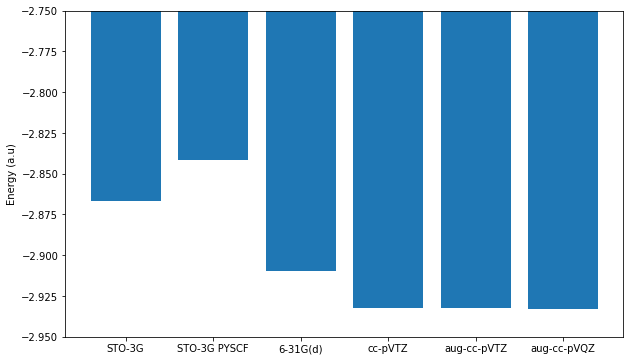

In [22]:
fig, ax =plt.subplots(1, figsize=(10,6))
ax.bar(
    [1,2,3,4,5,6],
    [-2.8669283534318275,-2.8418364990824458,-2.9098394146425748,-2.9322482557926945,-2.9322713663802804,-2.932878077558255],
    tick_label=['STO-3G','STO-3G PYSCF','6-31G(d)','cc-pVTZ','aug-cc-pVTZ','aug-cc-pVQZ'])
ax.set_ylim( -2.95,-2.75)
ax.set_ylabel("Energy (a.u)")
plt.show()

In [23]:
C = np.matmul(X,Cprime)
P = np.array([[ 1.28614168,0.54017322],
 [ 0.54017322 ,0.22687011]])

x = np.linspace(-8,8,num=1000)
r1 = abs(x+R/2)
r2 = abs(x-R/2)

Ψ_CGF_STO3G_He = Coeff[2,0]*(2*Expon[2,0]/np.pi)**(0.75)*np.exp(-Expon[2,0]*r1**2) \
                + Coeff[2,1]*(2*Expon[2,1]/np.pi)**(0.75)*np.exp(-Expon[2,1]*r1**2) \
                + Coeff[2,2]*(2*Expon[2,2]/np.pi)**(0.75)*np.exp(-Expon[2,2]*r1**2)
        
Ψ_CGF_STO3G_H = Coeff[2,0]*(2*Expon[2,0]/np.pi)**(0.75)*np.exp(-Expon[2,0]*r2**2) \
                + Coeff[2,1]*(2*Expon[2,1]/np.pi)**(0.75)*np.exp(-Expon[2,1]*r2**2) \
                + Coeff[2,2]*(2*Expon[2,2]/np.pi)**(0.75)*np.exp(-Expon[2,2]*r2**2)

density = np.zeros(x.shape)
        
density = density + P[0,0]*Ψ_CGF_STO3G_He*Ψ_CGF_STO3G_He
density = density + P[1,1]*Ψ_CGF_STO3G_H*Ψ_CGF_STO3G_H
density = density + 2*P[0,1]*Ψ_CGF_STO3G_He*Ψ_CGF_STO3G_H

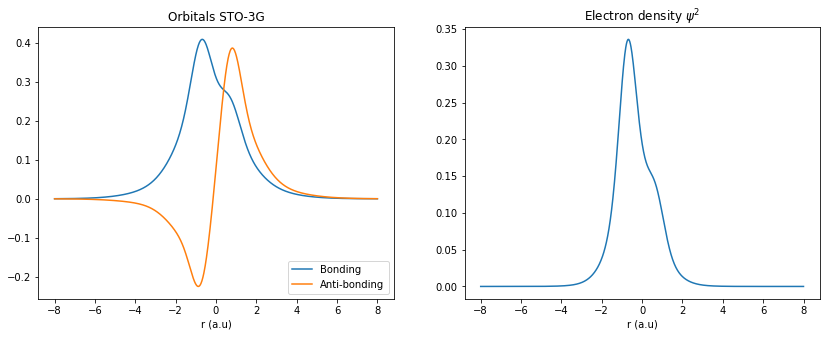

In [34]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(14,5))
ax1.set_title("Orbitals STO-3G")
ax1.plot(x,C[0,0]*Ψ_CGF_STO3G_He+C[1,0]*Ψ_CGF_STO3G_H,label="Bonding")
ax1.plot(x,C[0,1]*Ψ_CGF_STO3G_He+C[1,1]*Ψ_CGF_STO3G_H,label="Anti-bonding")
ax1.legend(loc=4)
ax2.set_title("Electron density $\psi^2$")
ax2.plot(x,density)
ax1.set_xlabel("r (a.u)")
ax2.set_xlabel("r (a.u)")

plt.show()

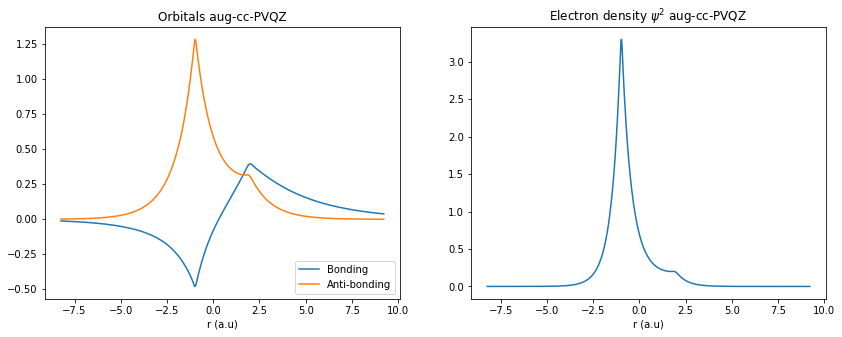

In [37]:
LUMO = np.genfromtxt('LUMOHeH+.txt')
HOMO = np.genfromtxt('HOMOHeH+.txt')
density = np.genfromtxt('densityHeH+.txt')
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(14,5))
ax1.set_title("Orbitals aug-cc-PVQZ")
ax1.plot(-LUMO[750:2250,2]/0.529177*2,LUMO[750:2250,4],label="Bonding")
ax1.plot(-HOMO[750:2250,2]/0.529177*2,HOMO[750:2250,4],label="Anti-bonding")
ax1.legend(loc=4)
ax2.set_title("Electron density $\psi^2$ aug-cc-PVQZ")
ax2.plot(-density[750:2250,2]/0.529177*2,density[750:2250,4])
ax1.set_xlabel("r (a.u)")
ax2.set_xlabel("r (a.u)")

plt.show()